# **1.**

A Decision Tree is a flowchart-like structure used for classification and regression. It splits the data based on conditions (like yes/no questions) at each node. The root is the starting point, internal nodes contain conditions, branches represent outcomes, and leaf nodes give the final prediction. The process continues until the data is fully separated or a stopping rule is met.
# **2.**

Impurity measures determine how mixed the classes are at a node. They help in choosing the best feature to split the data. Lower impurity means purer data, which leads to better decisions. Common measures include Gini Impurity and Entropy for classification, and Variance for regression.
# **3.**

The formula for Gini Impurity is:

$$
\text{Gini} = 1 - \sum_{i=1}^{n} p_i^2
$$

where $p_i$ is the probability of class $i$. A Gini of 0 means all data points at the node belong to a single class.
# **4.**

The formula for Entropy is:

$$
\text{Entropy} = -\sum_{i=1}^{n} p_i \log_2(p_i)
$$

where $p_i$ is the probability of class $i$. Entropy is zero when the data at the node is pure.
# **5.**

Information Gain is the reduction in impurity after a dataset is split. It is calculated as:
# **6.**

Gini Impurity is quicker to compute and is used in CART (Classification and Regression Tree) algorithms. Entropy is based on information theory and is used in ID3, C4.5, and similar algorithms. Both serve the same purpose: to find the best splits by measuring impurity.
# **7.**

A Decision Tree builds itself by selecting the best feature to split the dataset using impurity measures. At each node, it chooses the feature that results in the greatest reduction in impurity. This is done recursively until stopping criteria like maximum depth or minimum samples are met.
# **8.**

Pre-Pruning stops the tree from growing too much by applying limits during training. Examples include setting the maximum depth, requiring a minimum number of samples to split, or setting a minimum impurity decrease. This helps prevent overfitting.
# **9.**

Post-Pruning allows the tree to grow fully and then removes branches that do not improve performance. It uses validation data to check whether cutting certain branches increases accuracy or generalization.
# **10.**

Pre-Pruning controls tree growth from the beginning by setting rules in advance. Post-Pruning first allows the tree to overgrow and then trims it based on performance. Pre-Pruning is proactive, while Post-Pruning is corrective.
# **11.**

A Decision Tree Regressor is used for predicting continuous numerical values. Instead of classifying data into categories, it splits data to minimize the variance (spread) of values in each group, predicting average values at the leaves.
# **12.**

**Advantages** include:

* Easy to understand and interpret.
* Works on both classification and regression.
* Handles both numerical and categorical data.
* Requires little data preprocessing.

**Disadvantages** include:

* Prone to overfitting if not pruned.
* Can be unstable with small data changes.
* Less accurate compared to ensemble methods like Random Forest.

#13.

Missing values are handled by:

* Using surrogate splits (alternative features).
* Assigning the most common value.
* Splitting based on available values while estimating the missing ones.

#14.

Categorical features are handled by:

* Splitting the data based on each category.
* Grouping categories that give the best split.
* Encoding methods like one-hot encoding or label encoding before model training.

#**15.**

Real-world applications of Decision Trees include:

* Medical diagnosis (predicting disease based on symptoms).
* Loan approval (classifying applicants as risky or safe).
* Fraud detection (detecting unusual transaction patterns).
* Customer segmentation (grouping users by behavior or preferences).
* Predictive maintenance in manufacturing.



In [1]:
#1
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("1. Accuracy (Default Tree):", clf.score(X_test, y_test))


1. Accuracy (Default Tree): 1.0


In [2]:
#2
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)
print("2. Feature importances (Gini):", clf_gini.feature_importances_)


2. Feature importances (Gini): [0.01787567 0.01787567 0.88187037 0.08237829]


In [3]:
#3
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
print("3. Accuracy (Entropy):", clf_entropy.score(X_test, y_test))


3. Accuracy (Entropy): 0.9736842105263158


In [5]:
#5
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
graph = graphviz.Source(dot_data)
graph.render("5_decision_tree")


'5_decision_tree.pdf'

In [6]:
#6
clf_depth3 = DecisionTreeClassifier(max_depth=3)
clf_depth3.fit(X_train, y_train)
print("6. Accuracy (max_depth=3):", clf_depth3.score(X_test, y_test))
print("   Accuracy (full tree):", clf.score(X_test, y_test))


6. Accuracy (max_depth=3): 1.0
   Accuracy (full tree): 1.0


In [7]:
#7
clf_min_split = DecisionTreeClassifier(min_samples_split=5)
clf_min_split.fit(X_train, y_train)
print("7. Accuracy (min_samples_split=5):", clf_min_split.score(X_test, y_test))
print("   Accuracy (default split):", clf.score(X_test, y_test))


7. Accuracy (min_samples_split=5): 1.0
   Accuracy (default split): 1.0


In [8]:
#8
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_scaled, y_train)
print("8. Accuracy (scaled):", clf_scaled.score(X_test_scaled, y_test))
print("   Accuracy (unscaled):", clf.score(X_test, y_test))


8. Accuracy (scaled): 1.0
   Accuracy (unscaled): 1.0


In [9]:
#9
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(DecisionTreeClassifier())
ovr_clf.fit(X_train, y_train)
print("9. Accuracy (OvR strategy):", ovr_clf.score(X_test, y_test))


9. Accuracy (OvR strategy): 1.0


In [10]:
#12
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print("12. CCP Alphas and Accuracies:")
for alpha in ccp_alphas:
    clf_ccp = DecisionTreeClassifier(ccp_alpha=alpha)
    clf_ccp.fit(X_train, y_train)
    print(f"   Alpha: {alpha:.5f} -> Accuracy: {clf_ccp.score(X_test, y_test):.4f}")


12. CCP Alphas and Accuracies:
   Alpha: 0.00000 -> Accuracy: 1.0000
   Alpha: 0.00867 -> Accuracy: 1.0000
   Alpha: 0.01190 -> Accuracy: 1.0000
   Alpha: 0.01735 -> Accuracy: 1.0000
   Alpha: 0.02561 -> Accuracy: 0.9737
   Alpha: 0.24769 -> Accuracy: 0.6842
   Alpha: 0.32228 -> Accuracy: 0.2895


In [11]:
#13
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)
print("13. Precision:", precision_score(y_test, y_pred, average='macro'))
print("    Recall:", recall_score(y_test, y_pred, average='macro'))
print("    F1-Score:", f1_score(y_test, y_pred, average='macro'))


13. Precision: 1.0
    Recall: 1.0
    F1-Score: 1.0


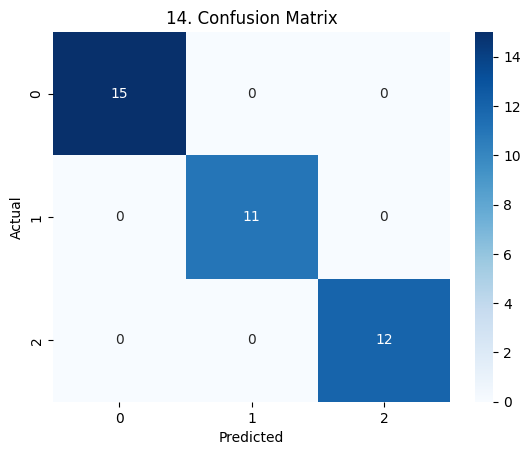

In [12]:
#14
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("14. Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
#15
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [2, 3, 4, 5], 'min_samples_split': [2, 4, 6]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("15. Best parameters:", grid.best_params_)
print("    Best CV accuracy:", grid.best_score_)


15. Best parameters: {'max_depth': 4, 'min_samples_split': 6}
    Best CV accuracy: 0.9371541501976285
